## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

## Load Dataset

In [2]:
# Load the dataset
data = pd.read_csv('Housing.csv')

In [3]:
# Explore the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Explore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Explore the dataset
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# Explore the dataset
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Performing Statistical Test

### 1. Apakah harga rata-rata dari properti di area ini lebih dari 6.000.000?

Hipotesis Nol (H0): μ = 6,000,000 (Harga rata-rata sama dengan 6,000,000) <br>
Hipotesis Alternatif (H1): μ > 6,000,000 (Harga rata-rata lebih dari 6,000,000)

Uji statistik yang sesuai (misalnya, Uji t atau Uji Z)


In [7]:
# data harga
price = data.price

n = len(price)  # Jumlah sampel
print(f"Jumlah data: {n}")
print("--"*30)

# menghitung rata-rata sampel dan standar deviasi
mean_sample = np.mean(price)
std_dev_sample = np.std(price, ddof=1)  # ddof=1 untuk menghitung standar deviasi sampel
print(f"rata-rata sampel: {mean_sample:.4f}")
print(f"standar deviasi sampel: {std_dev_sample:.4f}")
print("--"*30)

alpha = 0.05
print(f"alpha: {alpha}")

# Hitung statistik uji t
t_statistic = (mean_sample - 6000000) / (std_dev_sample / np.sqrt(n))
print(f"nilai uji t-statistic: {t_statistic:.4f}")

# degree of freedom
df = n - 1

# menghitung nilai kritis
t_critical = stats.t.ppf(1 - alpha, df)
print(f"nilai critical: {t_critical:.4f}")
print("--"*30)


# uji statistic t dengan nilai kritis 
if t_statistic > t_critical:
    print("Tolak H0. Rata-rata harga properti lebih dari 6,000,000.")
else:
    print("Tidak cukup bukti untuk menolak H0. Rata-rata harga properti sama dengan atau kurang dari 6,000,000.")

Jumlah data: 545
------------------------------------------------------------
rata-rata sampel: 4766729.2477
standar deviasi sampel: 1870439.6157
------------------------------------------------------------
alpha: 0.05
nilai uji t-statistic: -15.3926
nilai critical: 1.6477
------------------------------------------------------------
Tidak cukup bukti untuk menolak H0. Rata-rata harga properti sama dengan atau kurang dari 6,000,000.


#### Konfirmasi nilai rata-rata price menggunakan visualisasi

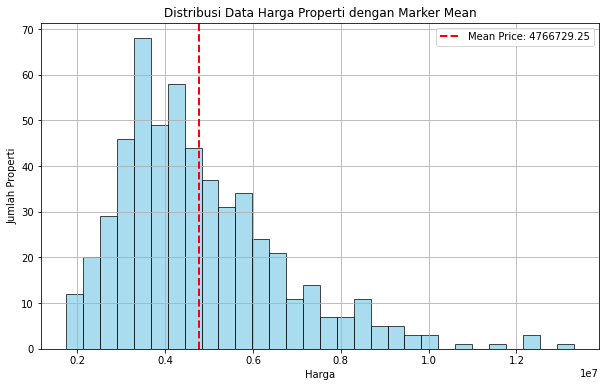

In [8]:
# Distribusi data pada kolom 'price' dengan marker pada nilai mean
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=30, edgecolor='k', alpha=0.7, color='skyblue')

# Hitung nilai mean
mean_price = data['price'].mean()

# Tambahkan marker pada nilai mean
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean Price: {mean_price:.2f}')

plt.title('Distribusi Data Harga Properti dengan Marker Mean')
plt.xlabel('Harga')
plt.ylabel('Jumlah Properti')
plt.legend()
plt.grid(True)
plt.savefig("uji-rata2harga.png", bbox_inches ="tight")
plt.show()


### 2. Apakah proporsi properti yang memiliki AC (Air Conditioning) lebih dari 50%?

Hipotesis Nol (H0): p <= 0.50 (Proporsi properti dengan AC kurang dari atau sama dengan 50%) <br>
Hipotesis Alternatif (H1): p > 0.50 (Proporsi properti dengan AC lebih dari 50%)

Uji statistik menggunakan Uji Z dan alpha 0.05

In [9]:
# menyiapkan data ac
data_ac = data.airconditioning.replace({'yes': 1, 'no': 0})

# rata-rata dan standar deviasi
p_sample = np.mean(data_ac)
std_dev_sample = np.sqrt((p_sample * (1 - p_sample)) / len(data_ac))
print(f"rata-rata sampel: {p_sample:.4f}")
print(f"standar deviasi: {std_dev_sample:.4f}")
print("--"*30)

# hitung statistic uji Z
p_null = 0.50  # Nilai hipotesis nol
z_statistic = (p_sample - p_null) / std_dev_sample

# hitung nilai kritis
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
print(f"alpha: {alpha}")
print(f"nilai uji z-statistics: {z_statistic:.4f}")
print(f"nilai z-critical: {z_critical:.4f}")
print("--"*30)

# pengujian hipotesis
if z_statistic > z_critical:
    print("Tolak H0. Proporsi properti dengan AC lebih dari 50%.")
else:
    print("Tidak cukup bukti untuk menolak H0. Proporsi properti dengan AC kurang dari atau sama dengan 50%.")


rata-rata sampel: 0.3156
standar deviasi: 0.0199
------------------------------------------------------------
alpha: 0.05
nilai uji z-statistics: -9.2629
nilai z-critical: 1.6449
------------------------------------------------------------
Tidak cukup bukti untuk menolak H0. Proporsi properti dengan AC kurang dari atau sama dengan 50%.


#### Konfirmasi perbandingan komposisi AC dan tanpa AC menggunakan visualisasi

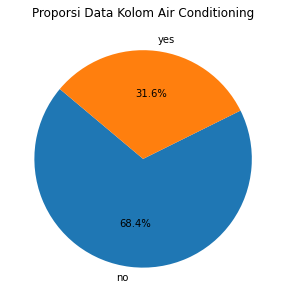

In [10]:
# Hitung jumlah setiap kategori
counts = data['airconditioning'].value_counts()

# Plot grafik pie
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Data Kolom Air Conditioning')
plt.show()


### 3. Apakah harga rata-rata properti dengan dan tanpa AC berbeda signifikan?

Hipotesis Nol (H0): μ1 = μ2 (Tidak ada perbedaan harga rata-rata antara properti dengan AC dan tanpa AC) <br>
Hipotesis Alternatif (H1): μ1 ≠ μ2 (Ada perbedaan harga rata-rata antara properti dengan AC dan tanpa AC)

Uji statistik menggunakan Uji t dan alpha = 0.05


In [11]:
# harga properti yang memiliki garasi
harga_AC = data[data['airconditioning'] == "yes"]['price']

# harga properti yang tidak memiliki garasi
harga_tanpa_AC = data[data['airconditioning'] == "no"]['price']

n1 = len(harga_AC)
n2 = len(harga_tanpa_AC)

# hitung rata-rata dan standar deviasi dari kedua data
mean_AC = np.mean(harga_AC)
std_dev_AC = np.std(harga_AC, ddof=1)  # ddof=1 untuk menghitung standar deviasi sampel
print(f"jumlah data dengan AC: {n1}")
print(f"rata-rata sampel dengan AC: {mean_AC:.4f}")
print(f"standar deviasi dengan AC: {std_dev_AC:.4f}")
print("--"*30)

mean_tanpa_AC = np.mean(harga_tanpa_AC)
std_dev_tanpa_AC = np.std(harga_tanpa_AC, ddof=1)
print(f"jumlah data tanpa AC: {n2}")
print(f"rata-rata sampel tanpa AC: {mean_tanpa_AC:.4f}")
print(f"standar deviasi tanpa AC: {std_dev_tanpa_AC:.4f}")
print("--"*30)



# statistic uji t
t_statistic = (mean_AC - mean_tanpa_AC) / np.sqrt((std_dev_AC**2 / n1) + (std_dev_tanpa_AC**2 / n2))

degree_of_freedom = n1 + n2 - 2  # Derajat kebebasan

alpha = 0.05
t_critical = stats.t.ppf(1 - alpha / 2, degree_of_freedom)
print(f"alpha: {alpha}")
print(f"nilai uji t-statistic: {t_statistic}")
print(f"nilai t-critical: {t_critical}")
print(f"--"*30)

# uji hipotesis
if abs(t_statistic) > t_critical:
    print("Tolak H0. Ada perbedaan harga rata-rata antara properti dengan AC dan tanpa AC.")
else:
    print("Tidak cukup bukti untuk menolak H0. Tidak ada perbedaan harga rata-rata antara properti dengan AC dan tanpa AC.")


jumlah data dengan AC: 172
rata-rata sampel dengan AC: 6013220.5814
standar deviasi dengan AC: 1998149.4750
------------------------------------------------------------
jumlah data tanpa AC: 373
rata-rata sampel tanpa AC: 4191939.6783
standar deviasi tanpa AC: 1493711.7610
------------------------------------------------------------
alpha: 0.05
nilai uji t-statistic: 10.65924416552892
nilai t-critical: 1.9643423968425016
------------------------------------------------------------
Tolak H0. Ada perbedaan harga rata-rata antara properti dengan AC dan tanpa AC.


#### Konfirmasi perbedaan harga AC dan tanpa AC menggunakan visualisasi

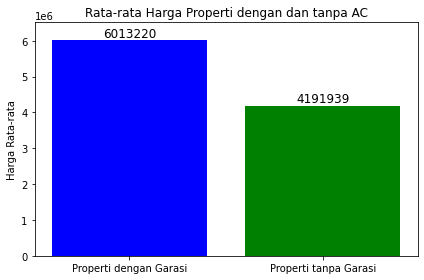

In [12]:
# Membuat plot visualisasi
kategori = ['Properti dengan Garasi', 'Properti tanpa Garasi']
rata_rata_harga = [np.mean(harga_AC), np.mean(harga_tanpa_AC)]

plt.figure(figsize=(6, 4))
bars = plt.bar(kategori, rata_rata_harga, color=['blue', 'green'])

# Menambahkan label pada tiap batang
for bar, nilai in zip(bars, rata_rata_harga):
    plt.text(bar.get_x() + bar.get_width() / 2, nilai + 100000, str(int(nilai)), ha='center', color='black', fontsize=12)

plt.title('Rata-rata Harga Properti dengan dan tanpa AC')
plt.ylabel('Harga Rata-rata')
plt.ylim(0, max(rata_rata_harga) + 500000)  # Sesuaikan batas atas sumbu y sesuai kebutuhan
plt.tight_layout()

plt.show()


### 4. Apakah harga rata-rata properti tiap furnishing status berbeda signifikan?

Hipotesis Nol (H0): Tidak ada perbedaan harga rata-rata antara ketiga kelompok furnishing status ("Furnished", "Semi-Furnished", dan "Unfurnished"). <br>
Hipotesis Alternatif (H1): Ada perbedaan harga rata-rata antara setidaknya satu pasang kelompok furnishing status.

Uji statistic menggunakan ANOVA, alpha = 0.05

In [13]:
data.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [14]:
# Pisahkan data menjadi tiga kelompok berdasarkan FurnishingStatus
furnished = data[data['furnishingstatus'] == 'furnished']['price']
semi_furnished = data[data['furnishingstatus'] == 'semi-furnished']['price']
unfurnished = data[data['furnishingstatus'] == 'unfurnished']['price']

# Lakukan uji ANOVA
f_statistic, p_value = stats.f_oneway(furnished, semi_furnished, unfurnished)

# Tentukan tingkat signifikansi (alpha)
alpha = 0.05

# Output hasil uji statistik
print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')
print(f"alpha: {alpha}")
print("--"*30)

# Pengambilan keputusan
if p_value < alpha:
    print("Tolak H0. Ada perbedaan harga rata-rata yang signifikan antara kelompok furnishing status.")
else:
    print("Gagal tolak H0. Tidak ada cukup bukti untuk menyatakan perbedaan harga rata-rata yang signifikan.")


F-statistic: 28.27
p-value: 0.0000
alpha: 0.05
------------------------------------------------------------
Tolak H0. Ada perbedaan harga rata-rata yang signifikan antara kelompok furnishing status.


#### Konfirmasi perbedaan harga furniture status menggunakan visualisasi

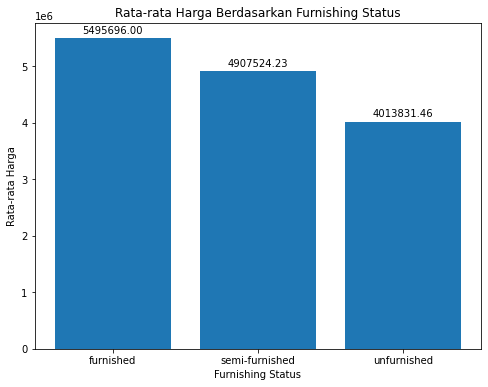

In [15]:
# Hitung rata-rata harga untuk setiap kelompok furnishing status
mean_prices = data.groupby('furnishingstatus')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(mean_prices['furnishingstatus'], mean_prices['price'])
plt.title('Rata-rata Harga Berdasarkan Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Rata-rata Harga')

# Tambahkan label nilai di atas setiap batang
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', # Format nilai dengan 2 desimal
                 xy=(bar.get_x() + bar.get_width() / 2, height), # Titik tengah batang
                 xytext=(0, 3),  # Jarak vertikal label dari batang
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()


## Building Regression Model:

### 1. Prediksi harga berdasarkan area
Ini merupakan contoh linear regression dengan satu prediktor.

In [16]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

**Visualisasikan Data**

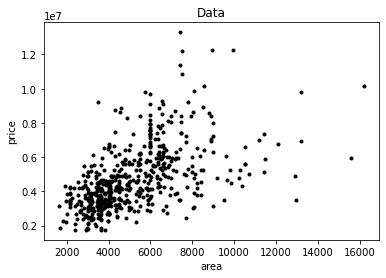

In [17]:
# Memisahkan variabel X (area) dan Y (price)
X = data['area'].values.reshape(-1, 1)
Y = data['price'].values.reshape(-1, 1)

# Plot the data
plt.scatter(X, Y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("area")
plt.ylabel("price")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

**Fit linear Regression**

- Build model using ols

In [18]:
# Create OLS model object
model = smf.ols("price ~ area", data)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_data = print_coef_std_err(results)

- Visualize the data and the regression line

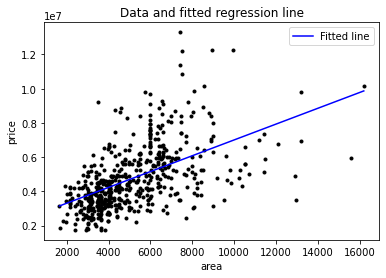

In [19]:
predictor = "area"
outcome = "price"
results_ = results_data.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("price")
plt.xlabel("area")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

**Coefficient Interpretation** 

In [20]:
results_data

,coef,std err
Intercept,2.387308e+06,174497.798084
area,4.619749e+02,31.225636


$$ y = 2387308 + 461x $$

- Rata-rata harga rumah ketika luas areanya 0 adalah 2387308
- Rata-rata perbedaan harga antara dua rumah dengan perbedaan satu satuan luas area adalah 461974 

**Scale Better unit for Price**

Nilai harga rumah dalam jutaan agak sulit dibaca, mari kita ubah nilai pada kolom price ke bentuk ribuan.

In [21]:
data["priceK"] = data["price"]/1000

In [22]:
# Create OLS model object
model = smf.ols("priceK ~ area", data)

# Fit the model
results_scaled = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_scaled_data = print_coef_std_err(results_scaled)
results_scaled_data

,coef,std err
Intercept,2387.308482,174.497798
area,0.461975,0.031226


$$ y = 2387 + 0.461x $$

- Rata-rata harga rumah ketika luas areanya 0 adalah 2387 ribu dolar
- Rata-rata perbedaan harga antara dua rumah dengan perbedaan satu satuan luas area adalah 0.46 ribu dolar

#### Performance Before and After Standardization

In [23]:
# R-squared before scalling
results.rsquared

0.2872931546811468

In [24]:
# R-squared after scalling
results_scaled.rsquared

0.2872931546811468

- Performa model sebelum dan sesudah scalling sama, tidak ada perbedaan sama sekali. Namun bisa mempermudah menginterpretasi model. Karena pada bentuk awal rawan salah interpretasi.

### 2. Prediksi harga berdasarkan luas area dan apakah ada AC atau tidak
contoh linear regression dengan multiple prediktor

- Label Encode kolom airconditioning

In [25]:
data["airconditioning"] = LabelEncoder().fit_transform(data["airconditioning"])

# Display the 5th first row after transforming
data[["airconditioning", "priceK"]].head()

,airconditioning,priceK
0,1,13300.0
1,1,12250.0
2,0,12250.0
3,1,12215.0
4,1,11410.0


- Fit Linear regression

In [26]:
# Create OLS model object
model = smf.ols('priceK ~ area + airconditioning', data)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_price_area_ac = print_coef_std_err(results)

- Visualize the data and regression line

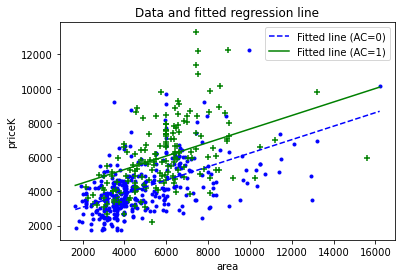

In [27]:
predictors = ["area","airconditioning"]
outcome = "priceK"
results_ = results_price_area_ac.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "+"}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], 
                marker = markers[i])
    
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i for i in range(2)]


# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (AC={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Memasukkan interation antara kolom area dan AC

- Fit Linear regression

In [28]:
# Create OLS model object
model = smf.ols('priceK ~ area + airconditioning + airconditioning:area', data)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_price_area_ac = print_coef_std_err(results)

- Visualize the data and regression line

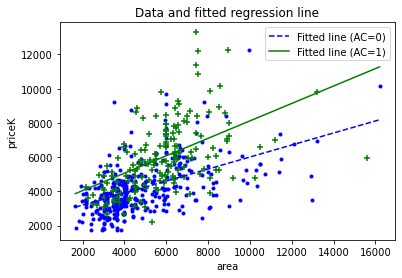

In [29]:
predictors = ["area","airconditioning", "airconditioning:area"]
outcome = "priceK"
results_ = results_price_area_ac.copy()
linestyles = {0 : "--", 1: "-"}
c = {0 : "b", 1: "g"}
markers = {0 : ".", 1: "+"}

# Plot the data
for i in range(2):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], marker = markers[i])

# Calculate the fitted values for two lines regarding the mom_hs
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(2)]

x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)

# Plot two fitted line
for i in range(2):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (AC={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

### Coefficient Interpretation 

In [30]:
results_price_area_ac

,coef,std err
Intercept,2497.870807,181.269487
area,0.351240,0.034259
airconditioning,530.746328,388.928791
airconditioning:area,0.158025,0.065347


$$\text{price} = 2497 + 0.35\text{ area} + 530\text{ airconditioning} + 0.16\text{ aircondotioning*area}$$

$$\text{AC}=0, \text{ price} = 2497 + 0.35\text{ area}$$
- Estimasi perbedaan harga rumah yang tidak ada AC tetapi berbeda satu satuan luas area adalah 0.35 ribu dollar atau 350 dollar

$$\text{AC}=1, \text{ price} = 3027 + 0.51 \text{ area}$$
- Estimasi perbedaan harga rumah yang ada AC tetapi berbeda satu satuan luas area adalah 0.51 ribu dollar atau 510 dollar


### 3. Prediksi harga berdasarkan area dan furnishing status
Linear Regression dengan Transformasi

In [31]:
# Create OLS model object
model = smf.ols('priceK ~ area + C(furnishingstatus)', data)

# Fit the model
results_init_model = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_price_area_fs = print_coef_std_err(results_init_model)
results_price_area_fs

,coef,std err
Intercept,3050.661639,216.999265
C(furnishingstatus)[T.semi-furnished],-363.892474,165.034605
C(furnishingstatus)[T.unfurnished],-1060.393894,175.263337
area,0.429851,0.030653


Pada model ini, ``furnishing status = furnished'' menjadi baseline

- Intercept 3050 (ribu) adalah harga rata-rata properti dengan ``furnishing status = furnished`` dan memiliki area = 0 (not a meaningfull scenario)
- Koefisien ``furnishing status = semi-furnished``, prediksi perbedaan harga ``furnishing status = furnished``dan ``furnishing status = semi-furnished`` yang memiliki area = 0, adalah -363 ribu dollar (lebih murah 363 ribu)
- Koefisien ``furnishing status = unfurnished``, prediksi perbedaan harga ``furnishing status = furnished``dan ``furnishing status = unfurnished`` yang memiliki area = 0, adalah -1060 ribu dollar (lebih murah 1060 ribu)

Intercept ini memiliki insight yang kurang tepat karena memprediksi area = 0

#### Improve Coeficient Interpretation dengan Standardization

In [32]:
mean_area = data["area"].mean()
std_area = data["area"].std()
area = data["area"]

data["z_area"] = (area-mean_area)/std_area

In [33]:
print(f"standar deviasi area = {std_area}")

standar deviasi area = 2170.141022508803


In [34]:
# Create OLS model object
model = smf.ols('priceK ~ z_area + C(furnishingstatus)', data)

# Fit the model
results_std_model = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_price_area_fs = print_coef_std_err(results_std_model)
results_price_area_fs

,coef,std err
Intercept,5264.625954,130.229825
C(furnishingstatus)[T.semi-furnished],-363.892474,165.034605
C(furnishingstatus)[T.unfurnished],-1060.393894,175.263337
z_area,932.836864,66.521237


Koefisien z-area berubah setelah distandarisasi, tetapi koefisien furnising status tetap sama

### Koefisien Interpretasi
- Intercept 5264 (ribu) adalah harga dengan ''furnishingstatus = furnished'' dan memiliki area rata-rata
- Koefisien z_area, presiksi perbedaan harga ''furnishingstatus = furnished'' dengan perbedaan 1 standar deviasi atau 2170 area adalah 932 (ribu). 

#### Performance Before and After transformation

In [35]:
# R-squared before transformation
results_init_model.rsquared

0.33587340586567804

In [36]:
# R-squared after transformation
results_std_model.rsquared

0.33587340586567804

- Performa model sebelum dan sesudah tranformasi tetap sama, tidak ada perbedaan sama sekali. 
- Namun bisa mempermudah menginterpretasi model.

### Make Conclusions and Recommendations:

### Conclusion
- Prediksi harga berdasarkan area.
    Harga berkorelasi positif dengan area. Semakin tinggi (luas) area, harganya juga mengalami kenaikan.
- Prediksi harga berdasarkan area dan apakah ada AC atau tidak.
    Harga berkorelasi positif dengan area dan adanya fasilitas AC. Jika ada AC maka harganya akan semakin naik.
- Prediksi harga berdasarkan area dan furnishing status
    Harga berkorelasi positif dengan area dan furnitured. Rumah yang masih semi-furnitured dan unfurnitured harganya akan semakin murah.

### Recommendation
- Pembeli bisa memprediksi harga rumah berdasarkan area, airconditioning, dan furnishing status. Agar bisa membeli properti dengan harga yang sesuai.
- Penjual juga bisa menentukan harga yang adil bagi penjual dan pembeli agar sama-sama untung.
- Melakukan penelitian lebih lanjut untuk melihat hubungan harga dengan fitur-fitur lainnya.

### Reference
- Statistic for Business - Pacmann.io
- Housing Prices Dataset - Kaggle